# Training Models


In [2]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "training_linear_models"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Linear Regression

**Linear Regression** makes variation by calculating the weighted sum of the input features + the bias term (intercept):

$$
\hat{y} = \theta_{0} + \theta_{1} x_{1} + \theta_{2} x_{2} + ... + \theta_{n} x_{n}
$$



<details>

<summary>Equation terms</summary>

- $\hat{y}$: Is the predicted value.
- $\alpha$: Is the constant value that represents the intercept of the line with the vertical axis.
- $\beta$: Is the slope, the **angular coefficient**.
- $X$: Is the independent variable.
  
</details>

The equation can also be expressed in vectorized form, for simplicity:

$$
\hat{y} = h_{\theta} (x) = \theta \cdot x
$$

Once you have the desired model, you can train it by _adjusting the parameters until they fit the data well_. A common metric for this is the **MSE** (Mean Squared Error).

In the following examples, the **MSE** will be used as the _cost function_:

$$
MSE = \frac{1}{m} \sum (\theta ^{T} x^{(i)} - y^{(i)})^{2}
$$

## The Normal Equation <a id="Anotherway"></a>

The **Normal Equation** is a _closed solution_ (gives the result directly) to find the value of $\theta$ that minimizes the MSE:

$$
\hat{\theta} = (X^{T} X)^{-1} X^{T} y
$$

To better visualize, a data similar to the linear one will be created:

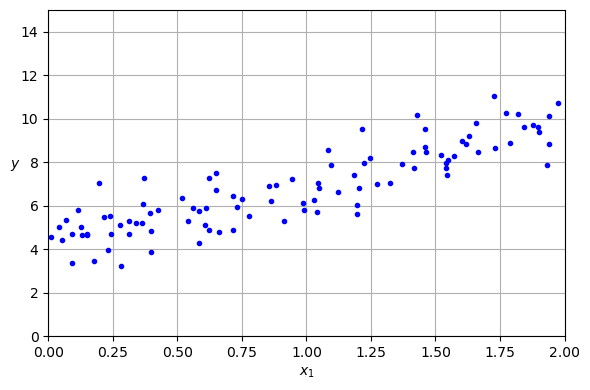

In [9]:
import numpy as np

np.random.seed(42)  # to make this code example reproducible
m = 100  # number of instances
X = 2 * np.random.rand(m, 1)  # column vector
y = 4 + 3 * X + np.random.randn(m, 1)  # column vector

###########################################################

import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
save_fig("generated_data_plot")
plt.show()

Below, we see the representation of the _Normal Equation_ in code format:

In [11]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [12]:
theta_best

array([[4.21509616],
       [2.77011339]])

The values identified were close to the exact value ($3x+ 4$). Is possible to use this value to fit another set:

In [14]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)  # add x0 = 1 to each instance
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

 Below we see a graph that demonstrate the result of regression:

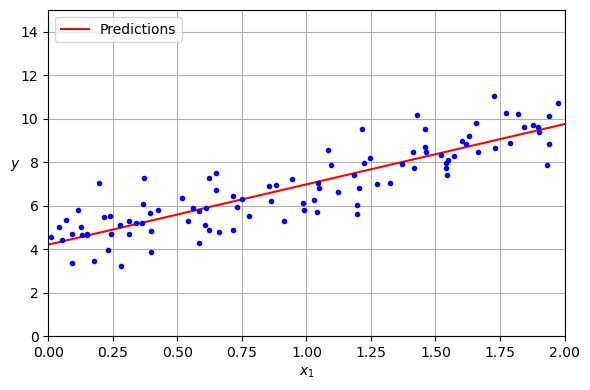

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")

# extra code – beautifies and saves Figure 4–2
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc="upper left")
save_fig("linear_model_predictions_plot")

plt.show()

To perform the same process using `sklearn` is similar:

In [18]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [19]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

##  Computational Complexity

#  Gradient Descent

**Gradient Descent** interactively adjusts parameters to minimize the cost function.

Basically, the algorithm operates by starting randomly, measuring the local gradient of the error function with the parameter $\theta$ and reducing the _Cost Function_ (MSE) until it converges to a minimum.

Some of the most important parameters of this algorithm are the _number of steps_, which dictates how many steps it will take, and the _Learning Rate_, which determines the size of each step.

If the _Learning Rate_ is **too large**, it will pass the _Global Minimum_ and will not converge.

If the _Learning Rate_ is **too small**, it will take a long time to converge, or it will not converge to the _Global Minimum_.

In some cases, there is both a _Local Minimum_ and a _Global Minimum_, but this does not apply to the MSE case.

## Batch Gradient Descent 

It is necessary to calculate for each parameter $\theta _{j}$ present in the model for the implementation of Gradient Descent. For this, the gradient of the cost function and the implementation of the following equation are used:

$$
\theta^{(next \:\: step)} = \theta - \eta \nabla _{\theta} MSE(\theta)
$$


Where


$$
\nabla _{\theta} MSE(\theta) = \frac{2}{m} X^{T}(X \theta - y)
$$


The equation below demonstrates the behavior of the variation of the _Learning Rate_ $\eta$ :

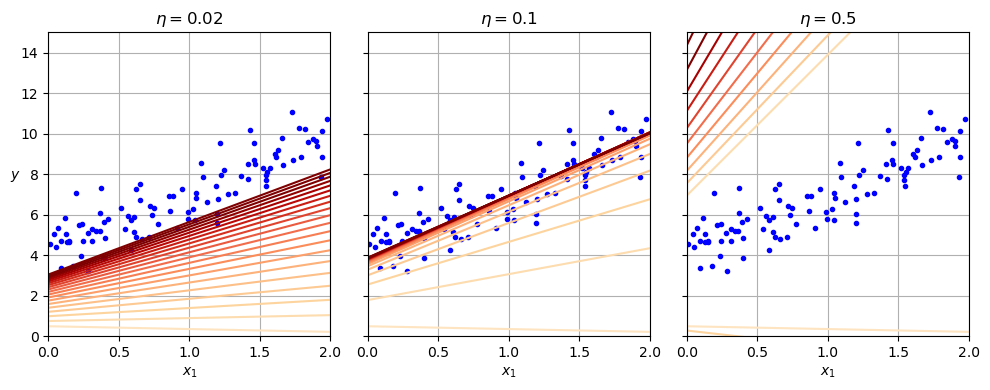

In [28]:
import matplotlib as mpl

def plot_gradient_descent(theta, eta):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_epochs = 1000
    n_shown = 20
    theta_path = []
    for epoch in range(n_epochs):
        if epoch < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch / n_shown + 0.15))
            plt.plot(X_new, y_predict, linestyle="solid", color=color)
        gradients = 2 / m * X_b.T @ (X_b @ theta - y)
        theta = theta - eta * gradients
        theta_path.append(theta)
    plt.xlabel("$x_1$")
    plt.axis([0, 2, 0, 15])
    plt.grid()
    plt.title(fr"$\eta = {eta}$")
    return theta_path

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

plt.figure(figsize=(10, 4))
plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0)
plt.subplot(132)
theta_path_bgd = plot_gradient_descent(theta, eta=0.1)
plt.gca().axes.yaxis.set_ticklabels([])
plt.subplot(133)
plt.gca().axes.yaxis.set_ticklabels([])
plot_gradient_descent(theta, eta=0.5)
save_fig("gradient_descent_plot")
plt.show()


## Stochastic Gradient Descent 

## Mini-Batch Gradient Descent 